# All systems -- combined figures

In [2]:
import pyemma
import numpy as np
from glob import glob

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper', font_scale=1.75)

# Auxiliary functions

In [3]:
from pyemma.plots.markovtests import _add_ck_subplot

# Made one change in plot_cktest from PyEMMA -- use bbox_to_anchor instead loc for legend to enable
# having a title above the legend which won't overlap with it
def plot_cktest(cktest, figsize=None, diag=False,  y01=True, layout=None,
                padding_between=0.1, padding_top=0.075, units='steps', dt=1., legend_bbox_to_anchor=[1,1], **plot_kwargs):
    """Plot of Chapman-Kolmogorov test
    Parameters
    ----------
    cktest : msm.ChapmanKolmogorovValidator
        Chapman-Kolmogorov Test
    figsize : shape, default=(10, 10)
        Figure size
    diag : bool, default=False
        Plot only diagonal elements of the test, i.e. self-transition
        probabilities.
    y01 : bool, default=True
        Scale all y-Axes to [0,1]. If True, the y-Axes can be shared
        and the figure is tighter. If False, each y Axis will be scaled
        automatically.
    layout : str or shape or None, default=None
        Organization of subplots. You can specify your own shape. If None,
        an automatic shape will be selected. Use 'wide' for plots that
        span the page width (double-column figures) and 'tall' for
        single-column figures.
    padding_between : float, default=0.1
        padding space between subplots (as a fraction of 1.0)
    padding_top : float, default=0.05
        padding space on top of subplots (as a fraction of 1.0)
    **plot_kwargs : optional keyword arguments for the matplotlib.pylab.plot() call
        The user is allowed to choose values like marker='x', linewidth=3 etc. Note that
        'linestyle' and 'color' are defaults and cannot be changed using plot_kwargs
    Returns
    -------
    fig : Figure object
    axes : Axis objects with subplots
    """
    import matplotlib.pylab as plt
    sharey = y01
    # first fix subfigure layout
    if diag:
        if layout is None or layout == 'wide':
            ncol = min(4, cktest.nsets)
            layout = (int(math.ceil(cktest.nsets / ncol)), ncol)
        elif layout == 'tall':
            nrow = min(4, cktest.nsets)
            layout = (nrow, int(math.ceil(cktest.nsets / nrow)))
    else:
        layout = (cktest.nsets, cktest.nsets)
    # fix figure size
    if figsize is None:
        size_per_subplot = min(3.0, 10.0 / np.max(np.array(layout)))
        figsize = (size_per_subplot*layout[1], size_per_subplot*layout[0])
    # generate subplots
    fig, axes = plt.subplots(layout[0], layout[1], sharex=True, sharey=sharey, figsize=figsize)
    axeslist = list(axes.flatten())
    # line objects
    lest = None
    lpred = None
    # plot
    for (k, ax) in enumerate(axeslist):
        if diag and k < cktest.nsets:
            ipos = int(k/layout[1])
            jpos = int(k%layout[1])
            lest, lpred = _add_ck_subplot(cktest, ax, k, k, ipos=ipos, jpos=jpos, y01=y01, units=units, dt=dt, **plot_kwargs)
            k += 1
        else:
            i = int(k/cktest.nsets)
            j = int(k%cktest.nsets)
            lest, lpred = _add_ck_subplot(cktest, ax, i, j, y01=y01, units=units, dt=dt, **plot_kwargs)
    # figure legend
    predlabel = 'predict'
    estlabel = 'estimate'
    if cktest.has_errors:
        predlabel += '     conf. {:3.1f}%'.format(100.0*cktest.conf)
    fig.legend((lest[0], lpred[0]), (estlabel, predlabel), ncol=2, frameon=False, bbox_to_anchor=legend_bbox_to_anchor)
    # change subplot padding
    plt.subplots_adjust(top=1.0-padding_top, wspace=padding_between, hspace=padding_between)
    # done
    return fig, axes

## Read data

In [4]:
dtrajs_chignolin = list(np.load('chignolin/chignolin_dtrajs.npy'))
dtrajs_trpcage = list(np.load('trpcage/trpcage_dtrajs.npy'))
dtrajs_villin = list(np.load('villin/villin_dtrajs.npy'))
dtrajs_ntl9 = list(np.load('ntl9/ntl9_dtrajs.npy', allow_pickle=True))

## Estimate timescales

In [5]:
its_chignolin = pyemma.msm.its(dtrajs_chignolin, 2000, errors='bayes')

In [6]:
its_villin = pyemma.msm.its(dtrajs_villin, 2000, errors='bayes')

In [7]:
its_trpcage = pyemma.msm.its(dtrajs_trpcage, 2000, errors='bayes')

In [8]:
its_ntl9 = pyemma.msm.its(dtrajs_ntl9, 2000, errors='bayes')

## plot

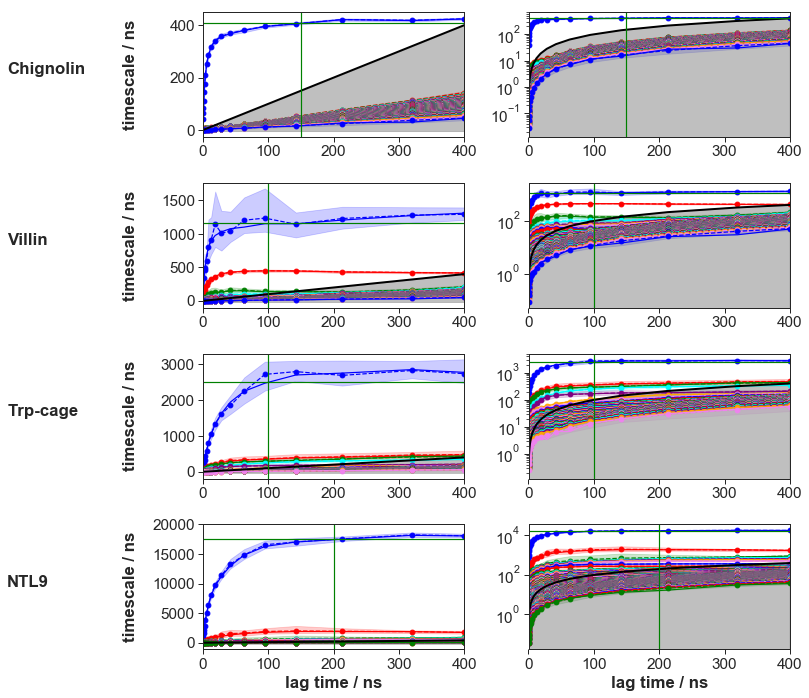

In [12]:
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(12,10))

pyemma.plots.plot_implied_timescales(its_chignolin, ax=ax1, ylog=False, dt=0.2, units='ns')
pyemma.plots.plot_implied_timescales(its_chignolin, ax=ax2, ylog=True, dt=0.2, units='ns')

pyemma.plots.plot_implied_timescales(its_villin, ax=ax3, ylog=False, dt=0.2, units='ns')
pyemma.plots.plot_implied_timescales(its_villin, ax=ax4, ylog=True, dt=0.2, units='ns')

pyemma.plots.plot_implied_timescales(its_trpcage, ax=ax5, ylog=False, dt=0.2, units='ns')
pyemma.plots.plot_implied_timescales(its_trpcage, ax=ax6, ylog=True, dt=0.2, units='ns')

pyemma.plots.plot_implied_timescales(its_ntl9, ax=ax7, ylog=False, dt=0.2, units='ns')
pyemma.plots.plot_implied_timescales(its_ntl9, ax=ax8, ylog=True, dt=0.2, units='ns')

ax1.text(-0.75, 0.5, 'Chignolin', transform=ax1.transAxes, fontweight='bold')
ax3.text(-0.75, 0.5, 'Villin', transform=ax3.transAxes, fontweight='bold')
ax5.text(-0.75, 0.5, 'Trp-cage', transform=ax5.transAxes, fontweight='bold')
ax7.text(-0.75, 0.5, 'NTL9', transform=ax7.transAxes, fontweight='bold')

ax1.get_yaxis().set_label_coords(-0.25,0.5)
ax3.get_yaxis().set_label_coords(-0.25,0.5)
ax5.get_yaxis().set_label_coords(-0.25,0.5)
ax7.get_yaxis().set_label_coords(-0.25,0.5)

ax1.set_ylabel('timescale / ns', fontweight='bold')
ax3.set_ylabel('timescale / ns', fontweight='bold')
ax5.set_ylabel('timescale / ns', fontweight='bold')
ax7.set_ylabel('timescale / ns', fontweight='bold')

ax2.set_ylabel('')
ax4.set_ylabel('')
ax6.set_ylabel('')
ax8.set_ylabel('')

ax7.set_xlabel('lag time / ns', fontweight='bold')
ax8.set_xlabel('lag time / ns', fontweight='bold')

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax4.set_xlabel('')
ax5.set_xlabel('')
ax6.set_xlabel('')

ax7.set_yticks([0, 5000, 10000, 15000, 20000])

ax1.axvline(150, c='green')
ax2.axvline(150, c='green')

ax3.axvline(100, c='green')
ax4.axvline(100, c='green')

ax5.axvline(100, c='green')
ax6.axvline(100, c='green')

ax7.axvline(200, c='green')
ax8.axvline(200, c='green')

ax1.axhline(2035.1/5, c='green')
ax2.axhline(2035.1/5, c='green')

ax3.axhline(5817.0/5, c='green')
ax4.axhline(5817.0/5, c='green')

ax5.axhline(12521.3/5, c='green')
ax6.axhline(12521.3/5, c='green')

ax7.axhline(87683.0/5, c='green')
ax8.axhline(87683.0/5, c='green')

plt.tight_layout()
plt.savefig('all_models_its.pdf', bbox_inches='tight')
plt.savefig('all_models_its.png', bbox_inches='tight', dpi=300)

In [17]:
# calc timescales at chosen lag times and plot those too as hlines

In [33]:
msm_chignolin = pyemma.msm.bayesian_markov_model(dtrajs_chignolin, 150*5)
msm_chignolin.timescales()[0]

2035.0953580390808

In [34]:
msm_villin = pyemma.msm.bayesian_markov_model(dtrajs_villin, 100*5)
msm_villin.timescales()[0]

5816.946547252406

In [35]:
msm_trpcage = pyemma.msm.bayesian_markov_model(dtrajs_trpcage, 100*5)
msm_trpcage.timescales()[0]

12521.347310066905

In [37]:
msm_ntl9 = pyemma.msm.bayesian_markov_model(dtrajs_ntl9, 200*5)
msm_ntl9.timescales()[0]

87638.02255726377

## Estimate CK tests

In [42]:
ck_test_chignolin = msm_chignolin.cktest(2, mlags=(np.arange(10) * 500/150).astype('int'), err_est=True)

In [43]:
ck_test_trpcage = msm_trpcage.cktest(2, mlags=(np.arange(10) * 2000/100).astype('int'), err_est=True)

In [53]:
ck_test_villin = msm_villin.cktest(3, mlags=(np.arange(20) * 500/100).astype('int'), err_est=True)

In [45]:
# this is very expensive -- consider setting err_est=False if re-running this notebook
ck_test_ntl9 = msm.cktest(2, mlags=(np.arange(10) * 10000/200).astype('int'), err_est=True)

In [67]:
sns.set_context('talk')

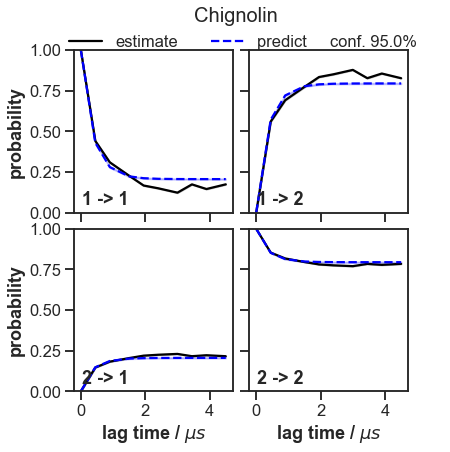

In [405]:
fig, axes = plot_cktest(ck_test_chignolin, units='ut', dt=0.0002, padding_top=0.085)
axes[0,0].set_ylabel('probability', weight='bold')
axes[1,0].set_xlabel('lag time / $\mu{s}$', weight='bold')
axes[1,0].set_ylabel('probability', weight='bold')
axes[1,1].set_xlabel('lag time / $\mu{s}$', weight='bold')
plt.suptitle('Chignolin', y=1.015, fontsize=20)
plt.savefig('chignolin_cktest.png', dpi=300, bbox_inches='tight')
plt.savefig('chignolin_cktest.pdf', bbox_inches='tight')

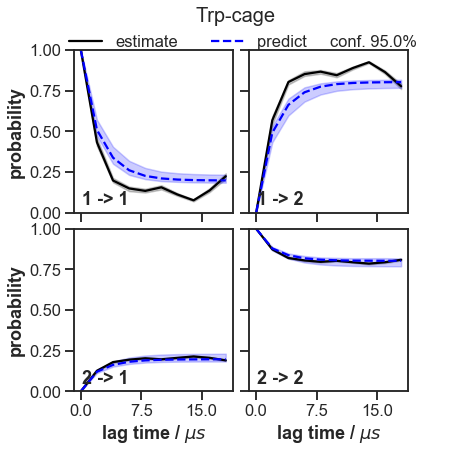

In [431]:
fig, axes = plot_cktest(ck_test_trpcage, units='ns', dt=0.0002, padding_top=0.085)
axes[0,0].set_ylabel('probability', weight='bold')
axes[1,0].set_xlabel('lag time / $\mu{s}$', weight='bold')
axes[1,0].set_ylabel('probability', weight='bold')
axes[1,1].set_xlabel('lag time / $\mu{s}$', weight='bold')
plt.suptitle('Trp-cage', y=1.015, fontsize=20)
plt.xticks([0,7.5,15])
plt.savefig('trpcage_cktest.png', dpi=300, bbox_inches='tight')
plt.savefig('trpcage_cktest.pdf', bbox_inches='tight')

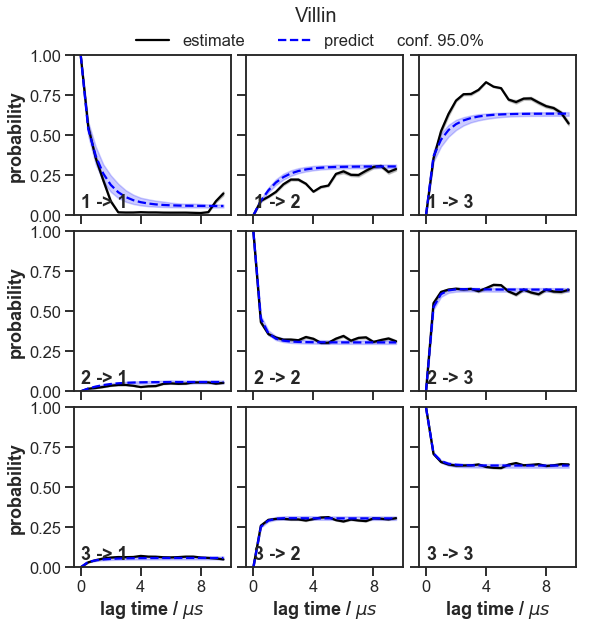

In [438]:
fig, axes = plot_cktest(ck_test_villin, units='ns', dt=0.0002, padding_top=0.085, legend_bbox_to_anchor=[0.77,0.94])
axes[0,0].set_ylabel('probability', weight='bold')
axes[2,0].set_xlabel('lag time / $\mu{s}$', weight='bold')
axes[1,0].set_ylabel('probability', weight='bold')
axes[2,1].set_xlabel('lag time / $\mu{s}$', weight='bold')
axes[2,0].set_ylabel('probability', weight='bold')
axes[2,2].set_xlabel('lag time / $\mu{s}$', weight='bold')
plt.suptitle('Villin', y=0.99, fontsize=20)
plt.xticks([0,4,8])
plt.savefig('villin_cktest.png', dpi=300, bbox_inches='tight')
plt.savefig('villin_cktest.pdf', bbox_inches='tight')

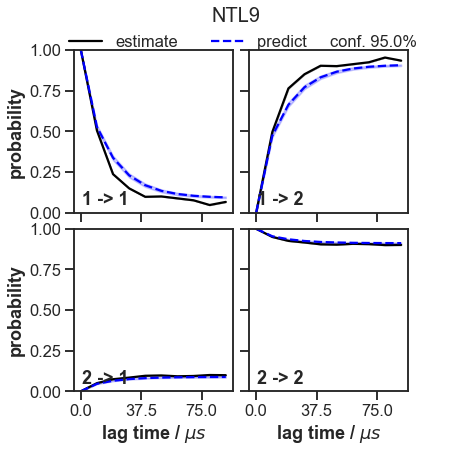

In [407]:
fig, axes = plot_cktest(ck_test_ntl9, units='ns', dt=0.0002, padding_top=0.085)
axes[0,0].set_ylabel('probability', weight='bold')
axes[1,0].set_xlabel('lag time / $\mu{s}$', weight='bold')
axes[1,0].set_ylabel('probability', weight='bold')
axes[1,1].set_xlabel('lag time / $\mu{s}$', weight='bold')
plt.suptitle('NTL9', y=1.015, fontsize=20)
plt.xticks([0,37.5,75])
plt.savefig('ntl9_cktest.png', dpi=300, bbox_inches='tight')
plt.savefig('ntl9_cktest.pdf', bbox_inches='tight')